# Coding Notebook for Phase 2 project
## John, Nick W, Nick K

# Project Intro
* stake_holders: House flippers
* business problem
* approach

In [ ]:
#images?

## Importing of libraries

In [70]:
# these packages are used in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import geopy.distance as geo
import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
%matplotlib inline

# Master Data File
From the kc-house-data we removed outliers for  <a href = www.gmail.com>link</a>
numerical column

In [5]:
#reading our cleaned and enhanced dataset
df = pd.read_csv('data/master_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True) #dropping an extra column artifact
df.head(2) #checking the layout of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,label_rural,label_suburban,label_urban,coordinates,closest_water
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,0,1,0,"(47.5112, -122.257)",0.680220
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,0,0,1,"(47.721, -122.319)",2.915718


## Exploring basics of our data

In [11]:
#converting to date time
df['date'] = pd.to_datetime(df['date'])

In [12]:
#checking the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21059 entries, 0 to 21058
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21059 non-null  int64         
 1   date            21059 non-null  datetime64[ns]
 2   price           21059 non-null  int64         
 3   bedrooms        21059 non-null  int64         
 4   bathrooms       21059 non-null  float64       
 5   sqft_living     21059 non-null  int64         
 6   sqft_lot        21059 non-null  int64         
 7   floors          21059 non-null  float64       
 8   waterfront      18748 non-null  object        
 9   view            20998 non-null  object        
 10  condition       21059 non-null  object        
 11  grade           21059 non-null  int64         
 12  sqft_above      21059 non-null  int64         
 13  sqft_basement   21059 non-null  object        
 14  yr_built        21059 non-null  int64         
 15  yr

In [ ]:
#converting the date column to datetime for better handling


In [7]:
#looking at our basic metrics mean, median, count etc
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,label_rural,label_suburban,label_urban,closest_water
count,2.105900e+04,2.105900e+04,21059.000000,21059.000000,21059.000000,2.105900e+04,21059.000000,21059.000000,21059.000000,21059.000000,17306.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000
mean,4.621894e+09,5.392477e+05,3.375279,2.114072,2071.458521,1.195228e+04,1.495133,7.654969,1779.117479,1970.897621,84.081764,98078.450639,47.561666,-122.216805,1980.105751,9797.450401,0.051902,0.631369,0.316729,5.405509
std,2.874741e+09,3.679167e+05,0.926421,0.765593,905.122712,2.686565e+04,0.540648,1.164359,815.290130,29.465601,400.975151,53.636967,0.137634,0.138271,680.420657,10169.465078,0.221834,0.482445,0.465212,5.782292
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,460.000000,651.000000,0.000000,0.000000,0.000000,0.000000
25%,2.146050e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.001000e+03,1.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.474700,-122.329000,1480.000000,5075.000000,0.000000,0.000000,0.000000,1.893041
50%,3.975400e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.540000e+03,1.500000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.573600,-122.234000,1830.000000,7560.000000,0.000000,1.000000,0.000000,3.383900
75%,7.345000e+09,6.430000e+05,4.000000,2.500000,2540.000000,1.040000e+04,2.000000,8.000000,2200.000000,1997.000000,0.000000,98118.000000,47.678550,-122.129000,2350.000000,9930.000000,0.000000,1.000000,1.000000,6.037817
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,13.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,94663.000000,1.000000,1.000000,1.000000,57.486122


In [8]:
#checking the median of our home prices
df.price.median()

450000.0

### Low hanging fruit metrics
given our business problem, we focus on sale price, we can see from above that the average home price is about 540K, and our median price is 450K

# Visulizing correlation and linearity
### Heatmap and pairplot

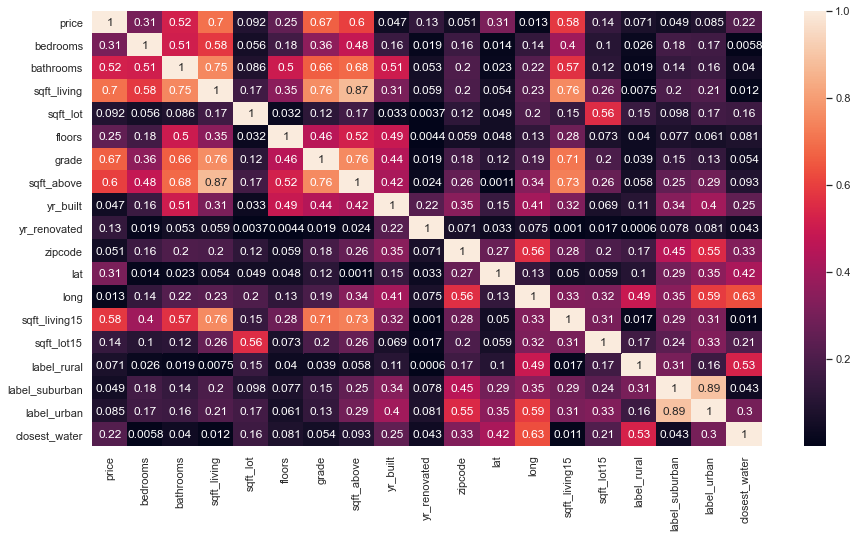

In [16]:
# Exploring correlation and linearity in our dataset with a HEATMAP
sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(df.drop('id', axis=1).corr().abs(), annot=True);

above we see that bedrooms, bathrooms, sqft_living, floors, grade, sqft_above, lat, sqft_living15, and closest_water all have Pearson Correlation coefficients above 0.2, which makes them metrics of interest for our model

### Exploring Linearity and normality of our data with a pairplot
we will reduce the metrics to those of interest and those that have been engineered

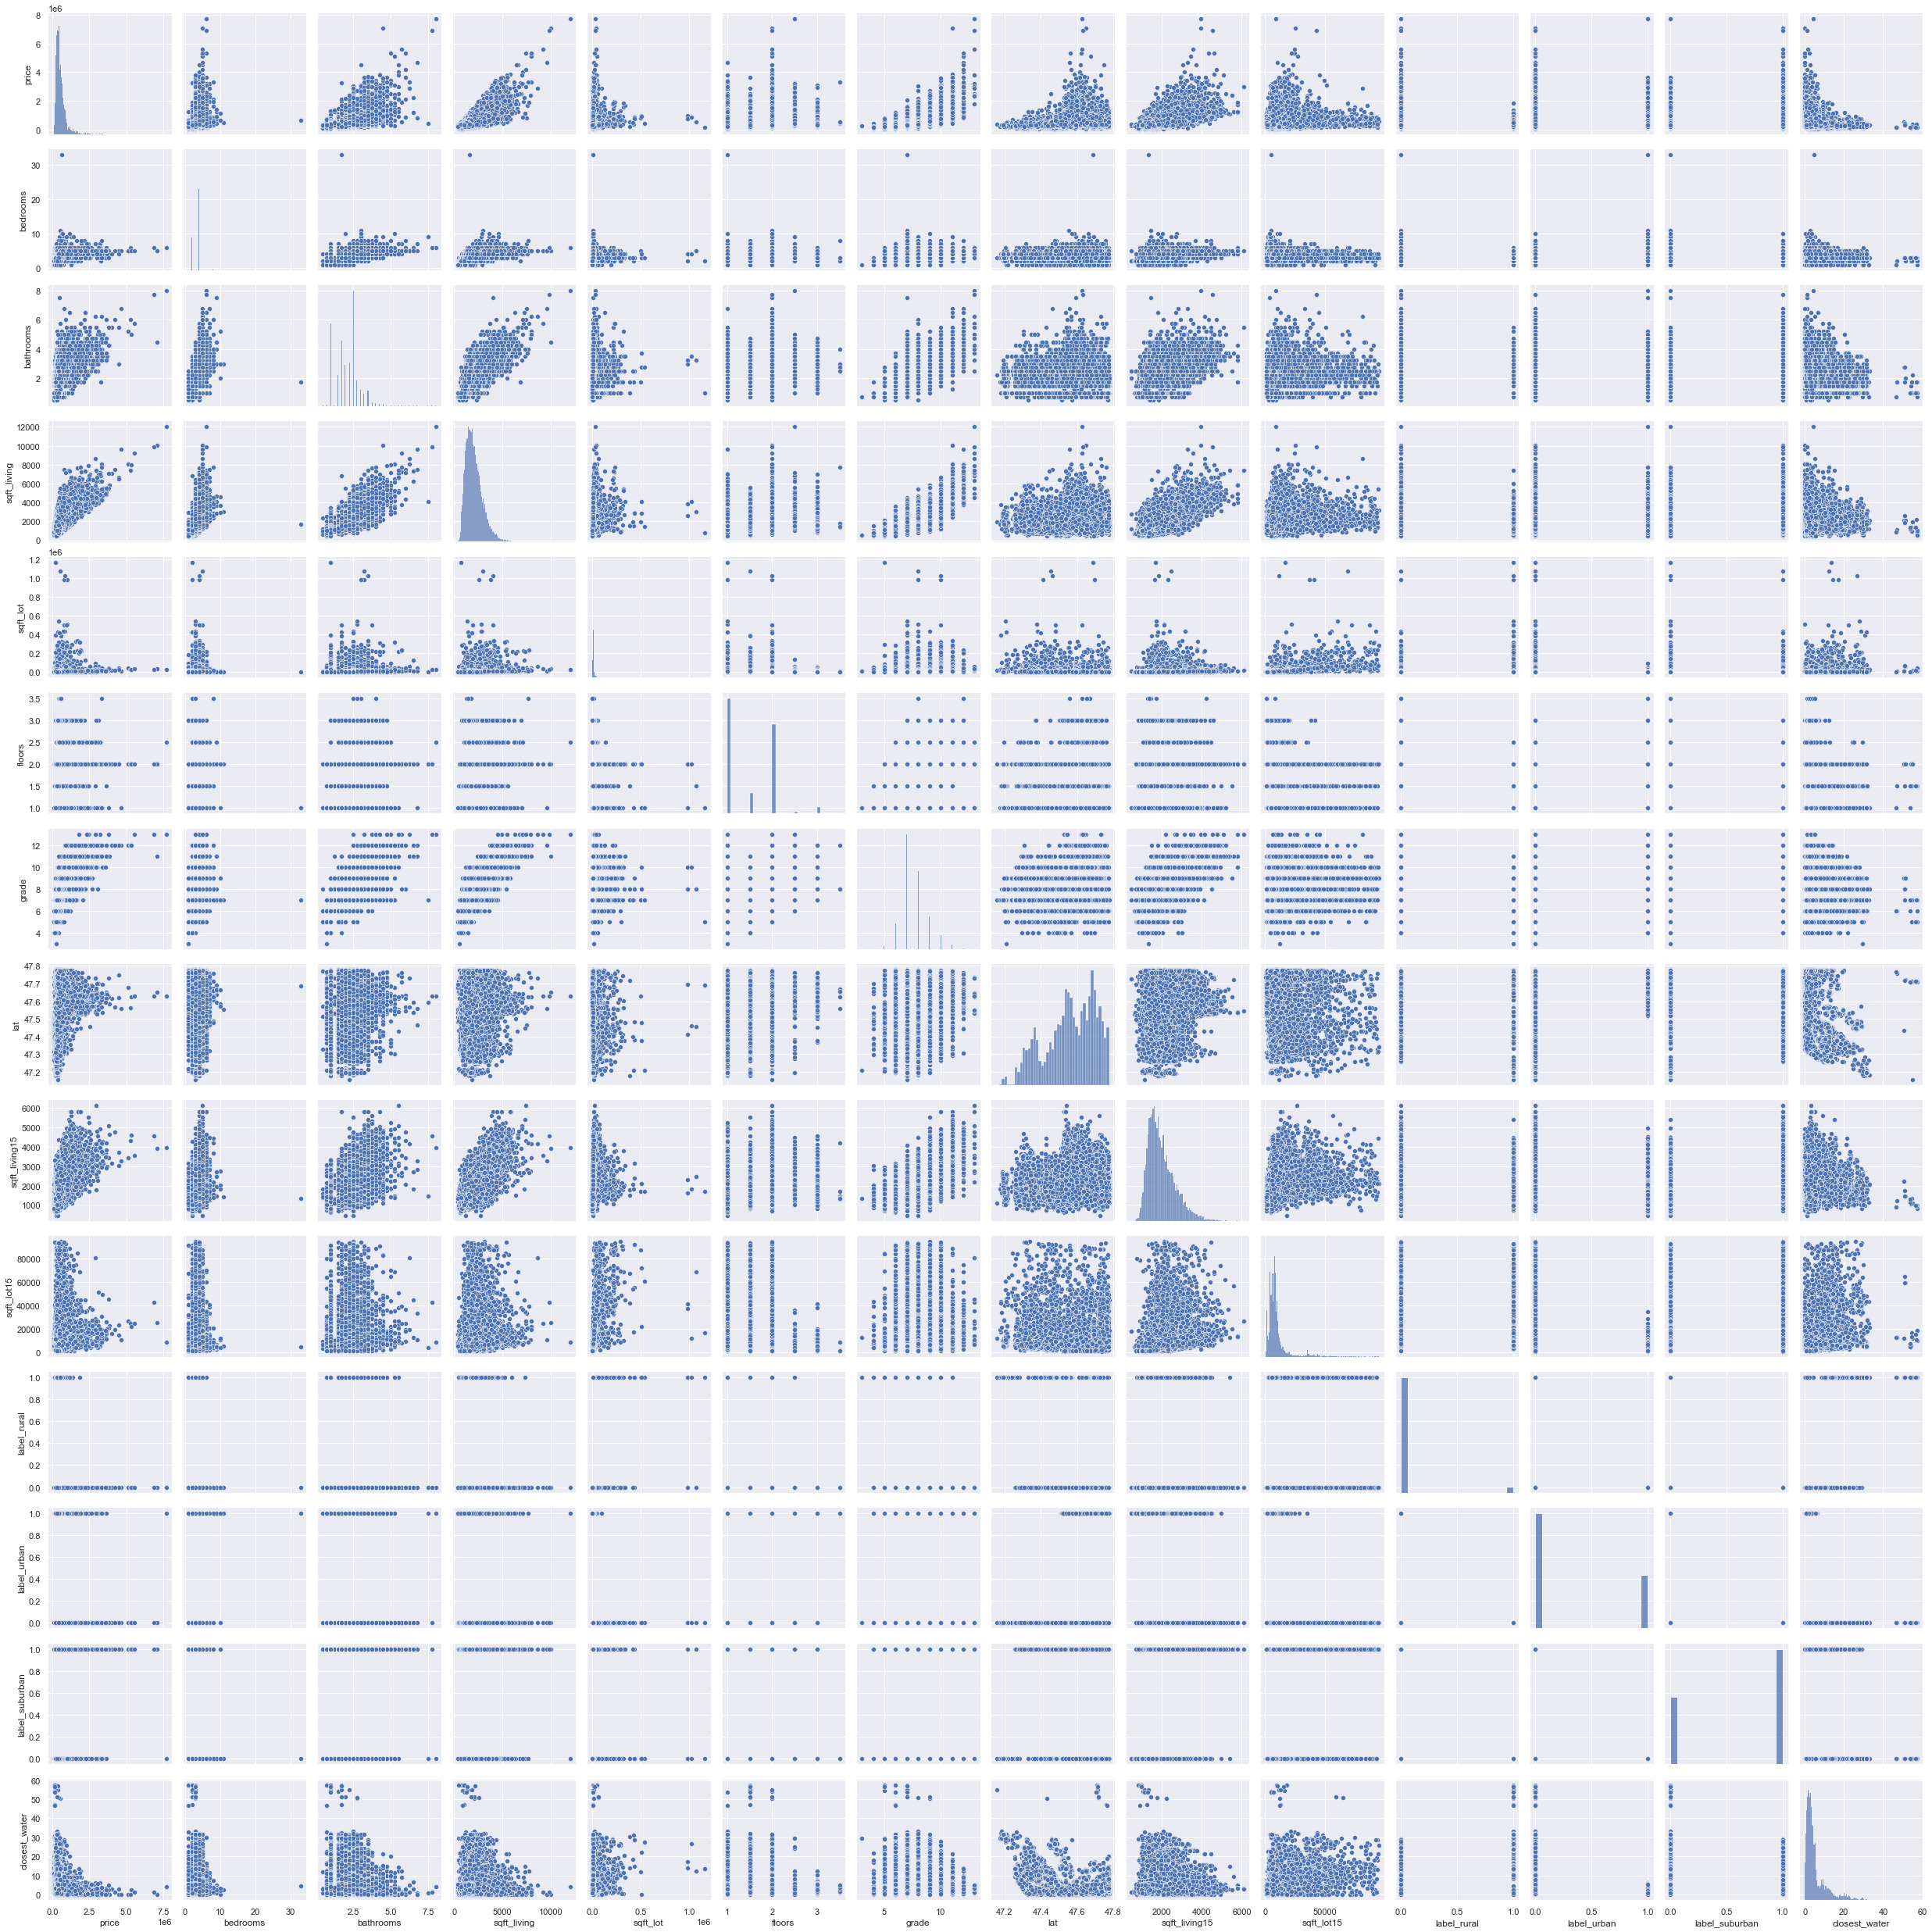

In [97]:
#creating a list of our metrics of interest
metrics_list = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'lat',
                'sqft_living15', 'sqft_lot15', 'label_rural', 'label_urban', 'label_suburban', 'closest_water']

#passing the list into the pairplot
sns.pairplot(df[metrics_list])

# Testing Assumptions

In [53]:
#This section we test our assumptions?

# Creating our dummy regression baseline model using mean price

In [101]:
#Dummy Regressor

dummy_regr = DummyRegressor(strategy = 'mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train) # looks at our predictions

array([538487.51118894, 538487.51118894, 538487.51118894, ...,
       538487.51118894, 538487.51118894, 538487.51118894])

notice the above predictions of our price from our training data. All the predictions are the same, i.e. the mean price in this sample 
### Scoring to get R-squared

In [102]:
#scoring our baseline model 
dummy_regr.score(X_train, y_train)

0.0

This R-squared of 0 means that 0% of the variation in price is explained by this baseline model. We can do better:

# Creating our first model
### splitting our train and test data 8:2 ratio

In [104]:
y = df.price
X = df[metrics_list].drop('price', axis=1) # dropped yr_renovated because of its null values

#Creating our test split. 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=33)

### Scaling our Train data

In [109]:
ss = StandardScaler() # instatiate scaler object
ss.fit(X_train) # Fit it to train
X_preds_st_scaled = ss.transform(X_train) #transforming and saving it as a scaled train data object

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

### fitting it to our linear regression and 

In [106]:
lr = LinearRegression()
lr.fit(X_preds_st_scaled, y_train)
lr.coef_
lr.score(X_preds_st_scaled, y_train)

0.6368413649539615

above R-squared says that our model predicts 63.7% of the variation in home prices of our training data, now we see how it does on new data (our test)

### trying the model on our test data

In [129]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
lr.score(X_test_scaled, y_test)

0.638541462517016

This works well. too well? we used many different metrics for this model, which is likely too complex and impacted by multicolinearity
We examine in more detail using stats models

## Examining our first model

In order to get a more complete summary we use statsmodels, but first we need to manipulate our train data to the right format

In [121]:
#Reassembling our dataframe using scaled X values
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = df[metrics_list].drop('price', axis=1).columns
y_train.reset_index(drop=True,inplace=True)
X_train_scaled_final = pd.concat((X_train_scaled,y_train),axis=1)



In [116]:
#running the same model to get a detailed summary
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'lat', 'sqft_living15', 'sqft_lot15', 'label_urban', 'label_suburban', 'closest_water']
predictors = '+'.join(x_cols)
formula = 'price' + '~' + predictors
model2 = ols(formula=formula, data=X_train_scaled_final)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2460.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:55:40   Log-Likelihood:            -2.3109e+05
No. Observations:               16847   AIC:                         4.622e+05
Df Residuals:                   16834   BIC:                         4.623e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.385e+05   1690.127    318.608      0.000    5.35e+05    5.42e+05
bedrooms       -3.334e+04   2156.541    -15.461      0.000   -3.76e+04   -2.91e+04
bathrooms       6335.1199   2877.454      2.202      0.028     695.007     1.2e+04
sqft_living     1.843e+05   3715.747     49.598      0.000    1.77e+05    1.92e+05
sqft_lot        1803.5281   2013.852      0.896      0.370   -2143.833    5750.889
floors         -2.846e+04   2097.862    -13.565      0.000   -3.26e+04   -2.43e+04
grade           9.631e+04   3013.309     31.963      0.000    9.04e+04    1.02e+05
lat             5.487e+04   2006.106     27.353      0.000    5.09e+04    5.88e+04
sqft_living15   3.801e+04   2870.159     13.243      0.000    3.24e+04    4.36e+04
sqft_lot15      3741.6062   2191.139      1.708      0.088    -553.255    8036.468
label_urban     4.151e+04   4628.753      8.967      0.000    3.24e+04    5.06e+04
label_suburban -2.231e+04   4390.246     -5.081      0.000   -3.09e+04   -1.37e+04
closest_water  -3.807e+04   2291.759    -16.614      0.000   -4.26e+04   -3.36e+04
==============================================================================
Omnibus:                    13866.751   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           800000.289
Skew:                           3.575   Prob(JB):                         0.00
Kurtosis:                      35.993   Cond. No.                         7.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
#Reassembling our dataframe using scaled X values
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = df[metrics_list].drop('price', axis=1).columns
y_test.reset_index(drop=True,inplace=True)
X_test_scaled_final = pd.concat((X_test_scaled,y_test),axis=1)
X_test_scaled_final

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,lat,sqft_living15,sqft_lot15,label_rural,label_urban,label_suburban,closest_water,price
0,0.668172,0.501111,0.122484,-0.097901,0.93053,0.297049,-1.406608,0.798426,-0.022338,-0.236027,-0.680290,0.764953,2.300023,363000
1,-1.478003,-1.460673,-0.676551,-0.215304,-0.91813,-0.562664,1.015308,-0.587041,-0.337234,-0.236027,1.469962,-1.307271,-0.384172,312000
2,-0.404916,0.501111,-0.376913,-0.335856,0.93053,0.297049,0.194209,-0.365956,-0.701170,-0.236027,-0.680290,0.764953,-0.341811,596000
3,-1.478003,-1.460673,-0.920701,-0.075751,-0.91813,-0.562664,-0.543401,-1.368209,-0.036880,-0.236027,-0.680290,0.764953,-0.440394,170000
4,0.668172,0.501111,1.665064,-0.213371,0.93053,1.156763,1.047252,2.390240,-0.370329,-0.236027,-0.680290,0.764953,0.240703,928990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.668172,0.501111,0.233461,-0.159196,0.93053,-0.562664,-0.359724,0.444690,-0.444339,-0.236027,-0.680290,0.764953,-0.714668,433000
4208,-0.404916,-0.806745,0.022604,-0.004365,-0.91813,-0.562664,-0.180404,0.297300,0.133305,-0.236027,1.469962,-1.307271,-0.884432,461550
4209,0.668172,0.501111,0.300047,-0.109566,0.93053,1.156763,0.488237,0.533124,-0.079000,-0.236027,-0.680290,0.764953,-0.348414,645000
4210,-0.404916,-1.460673,-0.743137,-0.247508,0.00620,-0.562664,0.774278,-0.351217,-0.670182,-0.236027,1.469962,-1.307271,-0.146503,887200


In [133]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'lat', 'sqft_living15', 'sqft_lot15', 'label_urban', 'label_rural', 'closest_water']
predictors = '+'.join(x_cols)
formula = 'price' + '~' + predictors
model_test = ols(formula=formula, data=X_test_scaled_final)
results = model_test.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     638.4
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:52   Log-Likelihood:                -57945.
No. Observations:                4212   AIC:                         1.159e+05
Df Residuals:                    4199   BIC:                         1.160e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.373e+05   3530.959    152.158      0.000     5.3e+05    5.44e+05
bedrooms       -3.79e+04   4696.804     -8.070      0.000   -4.71e+04   -2.87e+04
bathrooms     -3595.3809   5901.130     -0.609      0.542   -1.52e+04    7973.955
sqft_living    2.416e+05   7525.425     32.104      0.000    2.27e+05    2.56e+05
sqft_lot       1.758e+04   6171.390      2.849      0.004    5480.259    2.97e+04
floors        -2.392e+04   4392.891     -5.446      0.000   -3.25e+04   -1.53e+04
grade          7.207e+04   6254.849     11.522      0.000    5.98e+04    8.43e+04
lat            5.601e+04   4102.713     13.652      0.000     4.8e+04    6.41e+04
sqft_living15   2.47e+04   5979.143      4.131      0.000     1.3e+04    3.64e+04
sqft_lot15    -1.439e+04   4738.298     -3.037      0.002   -2.37e+04   -5100.347
label_urban    6.823e+04   4227.615     16.138      0.000    5.99e+04    7.65e+04
label_rural    7967.4052   4408.967      1.807      0.071    -676.503    1.66e+04
closest_water -2.946e+04   4775.090     -6.170      0.000   -3.88e+04   -2.01e+04
==============================================================================
Omnibus:                     4385.199   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           770419.889
Skew:                           4.774   Prob(JB):                         0.00
Kurtosis:                      68.564   Cond. No.                         5.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#IGNORE BELOW

In [19]:
df_not_water = df.loc[df['waterfront'] != 'YES']
df_not_water.shape

(20916, 26)

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='closest_water', ylabel='price'>

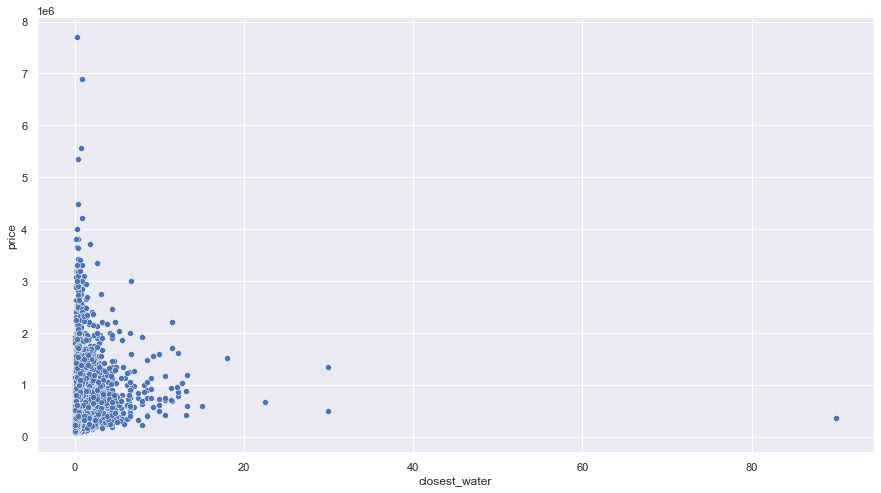

In [21]:
sns.scatterplot(1/df_not_water['closest_water'], df_not_water['price'])

In [29]:
df2 = df[df['closest_water'] != 0].copy()

<AxesSubplot:xlabel='closest_water', ylabel='Count'>

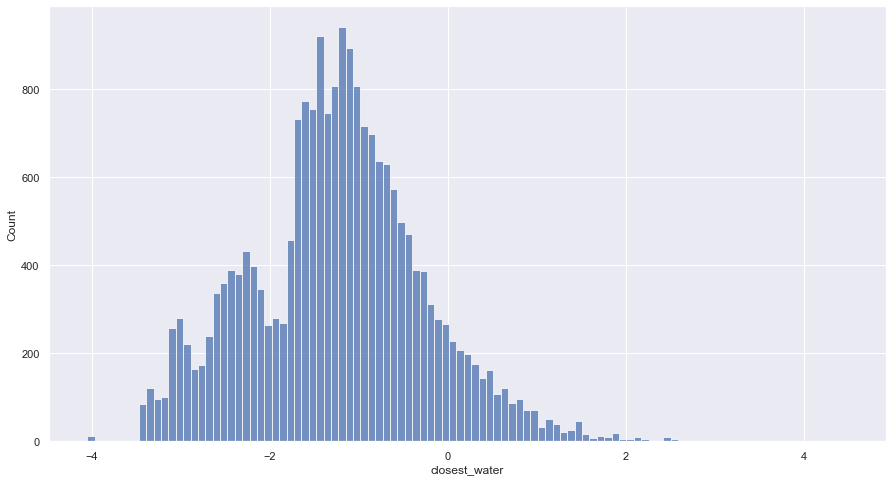

In [32]:
sns.histplot(np.log(1/df2['closest_water']))

<AxesSubplot:xlabel='closest_water', ylabel='Count'>

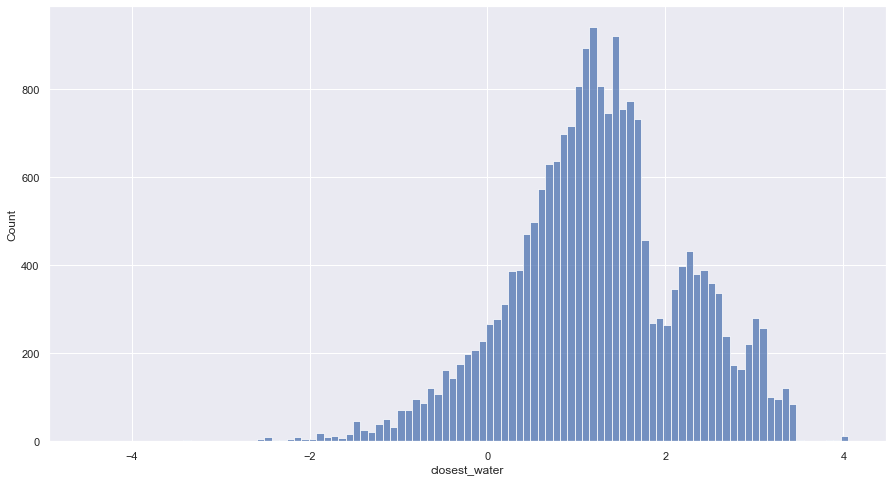

In [33]:
sns.histplot(np.log(df2['closest_water']))

In [36]:
df2['price'].corr(np.log(df2['closest_water']))

-0.2334431947801357

In [37]:
len(df2)

20914

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='closest_water'>

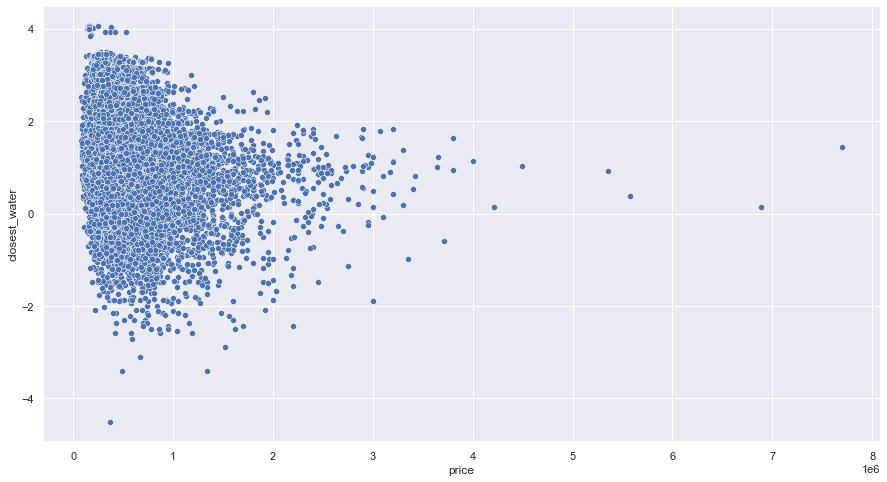

In [38]:
sns.scatterplot(df2['price'],np.log(df2['closest_water']))